# Pymaceuticals Inc.
---

## Observations and Insights ##
<p><em>Ramicane</em> is the most effective drug regimen according to the final average size of tumors - <em>Tumor Volume (mm3)</em>. <em>Ramicane's</em> relatively low standard deviation and SEM (standard error of mean) indicate a higher accuracy and reliability. <em>Capomulin</em> is the second most effective drug regimen according to the same statstical attributes - final average tumor size, standard deviation, and SEM.</p>
<p>However,the number of measurements for both <em>Ramicane</em> and <em>Capomulin</em> exceeded the number of measurements compared to the other drug regimens - a potential reason for the apparent success of <em>Ramicane</em> and <em>Capomulin</em></p>
<p>In the analysis of the <em>Capomulin: Mouse ID 'x401'</em>, a 10-unit difference in <em>Timepoint</em> followed a noticeable decrease in <em>Tumor Volume (mm3)</em>.</p>

<p>There was a high correlation - <b>0.84</b> - between <em>Tumor Volume (mm3)</em> and <em>Mouse Weight</em> for the <em>Capomulin</em> drug regimen. A possible explanation is the size of the tumor can add to the mouse's overall weight - i.e. larger tumor, larger mouse.</p>
    


In [1]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

## Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

## Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

## Combine the data into a single dataset
print(mouse_metadata.head(3))
print(study_results.head(3))
merge_mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

## Display the data table for preview
merge_mouse_df

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
## Checking the number of mice.
total_mice = len(merge_mouse_df)
print(total_mice)

1893


In [3]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_mouse_df[merge_mouse_df.duplicated([ 'Mouse ID','Timepoint' ])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
## Optional: Get all the data for the duplicate mouse ID. 
g989_duplicate_data = merge_mouse_df.loc[ 908:917, : ]
compression_opts = dict(method='zip',
                        archive_name='g989_duplicate_data.csv')  
g989_duplicate_data.to_csv('g989_duplicate_data.zip', index=False,
          compression=compression_opts)  

In [5]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_names = merge_mouse_df[ merge_mouse_df['Mouse ID'] == 'g989' ].index
merge_mouse_df.drop(index_names, inplace = True) 
clean_mouse_df = merge_mouse_df
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
## Checking the number of mice in the clean DataFrame.
count_mice = clean_mouse_df.drop_duplicates(subset=['Mouse ID'])
count_mice = len(count_mice)
count_mice

248

## Summary Statistics

In [7]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_df = clean_mouse_df[['Drug Regimen','Tumor Volume (mm3)']]

## Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats_df = drug_tumor_df.groupby(drug_tumor_df['Drug Regimen'])

## Mean
mean_df = summary_stats_df['Tumor Volume (mm3)'].mean()

## Median
med_df = summary_stats_df['Tumor Volume (mm3)'].median()

## Variance
var_df = summary_stats_df['Tumor Volume (mm3)'].var()

## Standard Deviation
std_df = summary_stats_df['Tumor Volume (mm3)'].std()

## SEM (standard error of the mean)
sem_df = summary_stats_df['Tumor Volume (mm3)'].sem()

In [8]:
## Assemble the resulting series into a single summary dataframe.
summary_df = pd.merge(mean_df, med_df, on='Drug Regimen')
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)_x' : 'Mean', 'Tumor Volume (mm3)_y' : 'Median'})
summary_df = pd.merge(summary_df, var_df, on='Drug Regimen')
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)' : 'Variance'})
summary_df = pd.merge(summary_df, std_df, on='Drug Regimen')
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)' : 'Stand Dev'})
summary_df = pd.merge(summary_df, sem_df, on='Drug Regimen')
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)' : 'SEM'})
summary_df

,Mean,Median,Variance,Stand Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
## Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = summary_stats_df.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
agg_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
## Dataframe for Bar Charts
total_measurement_df = drug_tumor_df.groupby(drug_tumor_df['Drug Regimen'])
total_measurement_df = total_measurement_df.count()

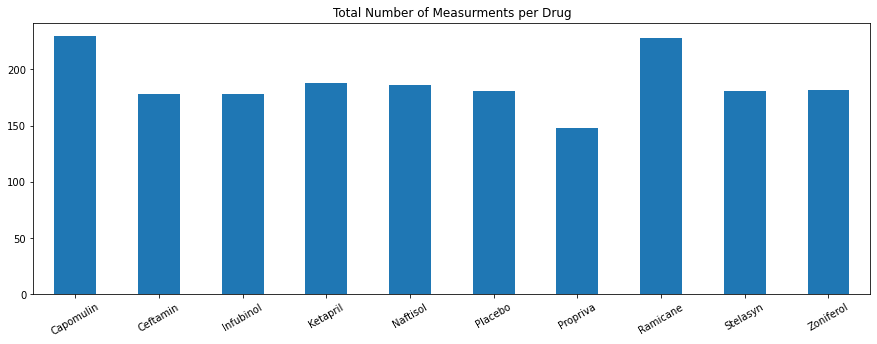

In [11]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurement_df.plot(kind='bar', title='Total Number of Measurements per Drug', figsize=(15,5), width=.5, legend=None)
plt.xlabel('')
plt.xticks(rotation = 30)
plt.show()

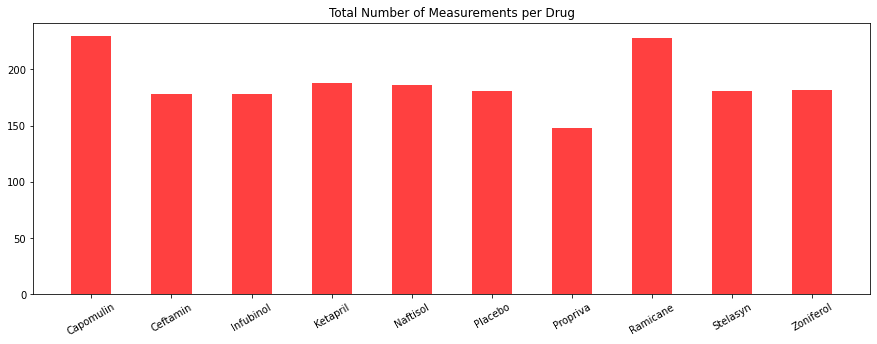

In [12]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(total_measurement_df.index, total_measurement_df['Tumor Volume (mm3)'], color='r', alpha=0.75, align='center',
       width=.5)
plt.title('Total Number of Measurements per Drug')
plt.xticks(rotation = 30)
plt.show()

In [13]:
## Dataframe for Pie Charts
gender_df = clean_mouse_df['Sex']
gender_df = pd.DataFrame(gender_df)
female_count = len(gender_df.loc[gender_df['Sex']=="Female",:])
male_count = len(gender_df.loc[gender_df['Sex']=="Male",:])


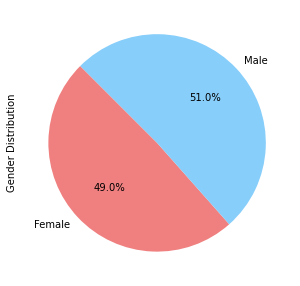

In [14]:
## Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pandas_df = pd.DataFrame({'Gender Distribution': [female_count , male_count]},
                  index=['Female','Male'])
color = ('lightcoral', 'lightskyblue')
plot = gender_pandas_df.plot.pie(y='Gender Distribution',
                                 figsize=(5, 5),
                                 legend=None,
                                 colors = color,
                                 autopct='%1.1f%%',
                                 startangle=135)

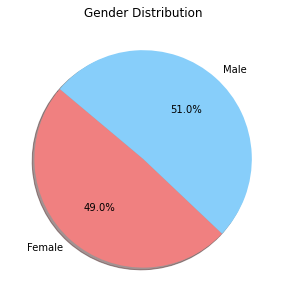

In [28]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female" , "Male"]
gender_counts = [female_count , male_count]
colors = ["lightcoral" , "lightskyblue"]

plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Capomulin, Ramicane, Infubinol, and Ceftamin

## Start by getting the last (greatest) timepoint for each mouse
## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol_df = clean_mouse_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)',
                                    'Drug Regimen']]
final_tumor_vol_df = final_tumor_vol_df.loc[(final_tumor_vol_df['Drug Regimen'] == 'Capomulin')|
                                            (final_tumor_vol_df['Drug Regimen'] == 'Ramicane')|
                                            (final_tumor_vol_df['Drug Regimen'] == 'Infubinol')|
                                            (final_tumor_vol_df['Drug Regimen'] == 'Ceftamin')]
final_tumor_vol_df = final_tumor_vol_df.groupby(['Mouse ID','Drug Regimen']).max(['Timpoint']).reset_index()
final_tumor_vol_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,45.466677
4,a444,Ramicane,45,45.000000
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,45.000000
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,45.000000


   Tumor Volume (mm3) Drug Regimen Mouse ID
0           67.973419    Infubinol     a203
1           65.525743    Infubinol     a251
2           62.999356     Ceftamin     a275
3           45.466677     Ramicane     a411
4           45.000000     Ramicane     a444
5           45.000000     Ramicane     a520
6           57.031862    Infubinol     a577
7           46.910892     Ramicane     a644
8           66.083066    Infubinol     a685
9           45.651331    Capomulin     b128


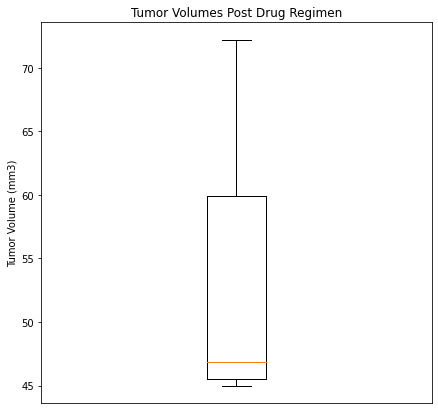

In [17]:
## Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

## Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = final_tumor_vol_df[['Tumor Volume (mm3)', 'Drug Regimen', 'Mouse ID']]
print(tumor_vol_list.head(10))

tumors = tumor_vol_list['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.set_title('Tumor Volumes Post Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumors)
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

In [18]:
## Quantitatively determine if there are any potential outliers. 

## Calculate the IQR
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The interquartile range of tumor volumes is: {iqr} (mm3)")

## Create lists for each of the four druge regimens
ramicane_list = final_tumor_vol_df.loc[(final_tumor_vol_df['Drug Regimen'] == 'Ramicane')]
capomulin_list = final_tumor_vol_df.loc[(final_tumor_vol_df['Drug Regimen'] == 'Capomulin')]
infubinol_list = final_tumor_vol_df.loc[(final_tumor_vol_df['Drug Regimen'] == 'Infubinol')]
ceftamin_list = final_tumor_vol_df.loc[(final_tumor_vol_df['Drug Regimen'] == 'Ceftamin')]

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values 'below' {lower_bound} (mm3) could be outliers.")
print(f"Values 'above' {upper_bound} (mm3) could be outliers.")
    
## Determine outliers using upper and lower bounds
outlier_drug = final_tumor_vol_df.loc[(final_tumor_vol_df['Tumor Volume (mm3)'] < lower_bound) |
                                      (final_tumor_vol_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_count = len(outlier_drug)
print(f"There are {outlier_count} potential outliers given the data.")

The interquartile range of tumor volumes is: 14.420417467500002 (mm3)
Values 'below' 23.87921808625 (mm3) could be outliers.
Values 'above' 81.56088795625001 (mm3) could be outliers.
There are 0 potential outliers given the data.


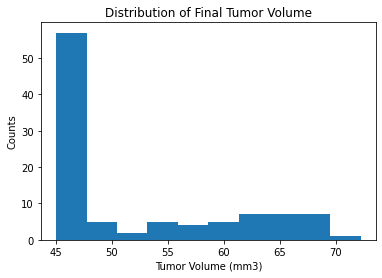

In [19]:
## Generate Distribution of Final Tumor Volumes
plt.hist(final_tumor_vol_df['Tumor Volume (mm3)'])
plt.title('Distribution of Final Tumor Volume')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()

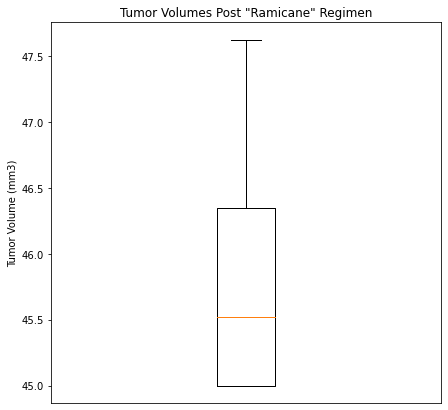

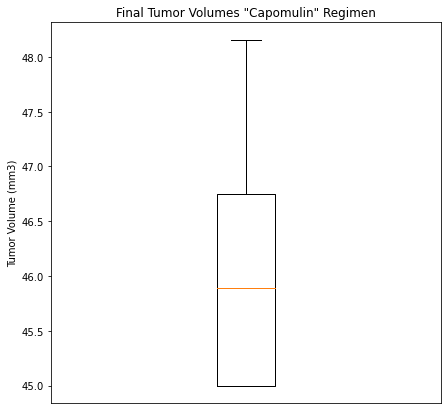

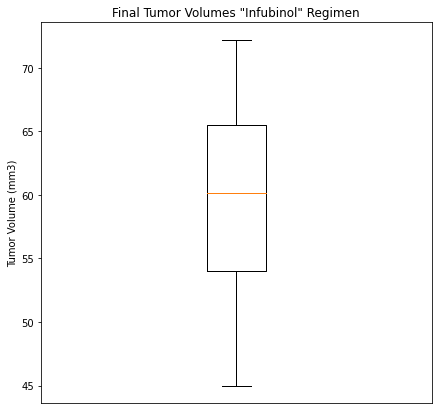

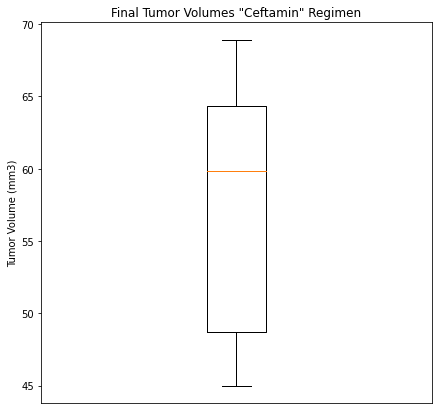

In [30]:
## Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Ramicane Box Plot
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.set_title('Tumor Volumes Post "Ramicane" Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ramicane_list['Tumor Volume (mm3)'])
plt.tick_params(bottom=False, labelbottom=False)
plt.show()
## Capomulin Box Plot
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.set_title('Final Tumor Volumes "Capomulin" Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_list['Tumor Volume (mm3)'])
plt.tick_params(bottom=False, labelbottom=False)
plt.show()
## Infubinol Box Plot
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.set_title('Final Tumor Volumes "Infubinol" Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(infubinol_list['Tumor Volume (mm3)'])
plt.tick_params(bottom=False, labelbottom=False)
plt.show()
## Ceftamin Box Plot
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.set_title('Final Tumor Volumes "Ceftamin" Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ceftamin_list['Tumor Volume (mm3)'])
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

  Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen  Weight (g)
0     x401          0           45.000000    Capomulin          15
1     x401          5           45.473753    Capomulin          15
2     x401         10           39.113891    Capomulin          15
3     x401         15           39.776250    Capomulin          15
4     x401         20           36.065835    Capomulin          15
5     x401         25           36.617120    Capomulin          15
6     x401         30           32.915292    Capomulin          15
7     x401         35           30.206825    Capomulin          15
8     x401         40           28.167397    Capomulin          15
9     x401         45           28.484033    Capomulin          15


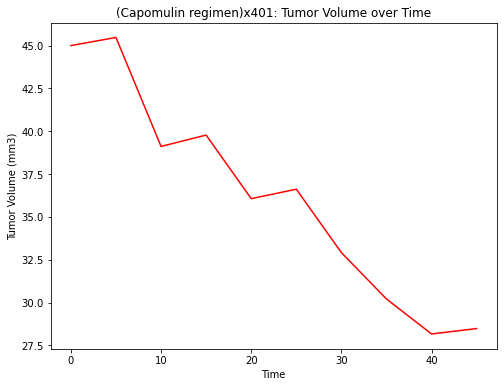

In [29]:
## Line and Scatter Plots

## Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## Create a Dataframe for the Mouse Treated with Capomulin (Mouse ID = 'x401')
sample_capomulin_df = clean_mouse_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)',
                                    'Drug Regimen', 'Weight (g)']]
sample_capomulin_df = sample_capomulin_df.loc[(sample_capomulin_df['Drug Regimen'] == 'Capomulin')]
x401_capomulin_df = sample_capomulin_df.loc[(sample_capomulin_df['Mouse ID'] == 'x401')].reset_index()
del x401_capomulin_df['index']
print(x401_capomulin_df)

## Generate the Line Plot
plt.figure(figsize=(8, 6))
plt.plot(x401_capomulin_df['Timepoint'], x401_capomulin_df['Tumor Volume (mm3)'], color='red')
plt.title('(Capomulin regimen)x401: Tumor Volume over Time')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time')
plt.show()

  Mouse ID  Tumor Volume (mm3)  Weight (g)
0     b128           41.963636        22.0
1     b742           40.083699        21.0
2     f966           36.505973        17.0
3     g288           41.990097        19.0
4     g316           44.613344        22.0
5     i557           44.805810        24.0
6     i738           39.141053        20.0
7     j119           44.465236        23.0
8     j246           43.216925        21.0
9     l509           44.434474        21.0


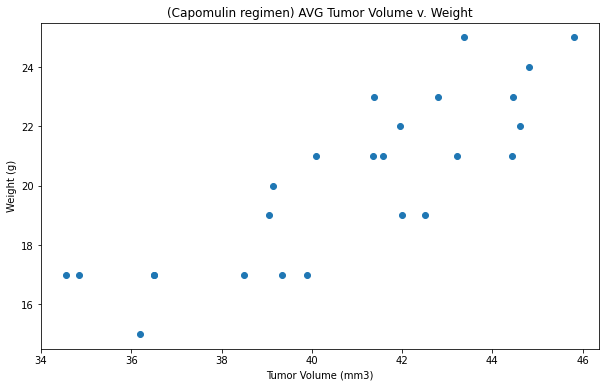

In [25]:
## Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
## Create a Dataframe of AVG Tumor Volume GROUPED BY Mouse ID for Capomulin Regimen
tumor_weight_capomulin_df = sample_capomulin_df.groupby(sample_capomulin_df['Mouse ID']).mean(['Tumor Volume (mm3)']).reset_index()
del tumor_weight_capomulin_df['Timepoint']
print(tumor_weight_capomulin_df.head(10))

## Generate Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(tumor_weight_capomulin_df['Tumor Volume (mm3)'], tumor_weight_capomulin_df['Weight (g)'])
plt.title('(Capomulin regimen) AVG Tumor Volume v. Weight')
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.show()

In [26]:
## Correlation and Regression

## Correlation Coefficient for Mouse Weight and Tumor Volume for Capomulin Regimen
mouse_weight_capomulin = tumor_weight_capomulin_df['Weight (g)']
tumor_vol_capomulin = tumor_weight_capomulin_df['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight_capomulin, tumor_vol_capomulin)

print(f"The correlation between Mouse Weight and Tumor Volume for the Capomulin Drug Regimen is {round(correlation[0],2)}")

The correlation between Mouse Weight and Tumor Volume for the Capomulin Drug Regimen is 0.84


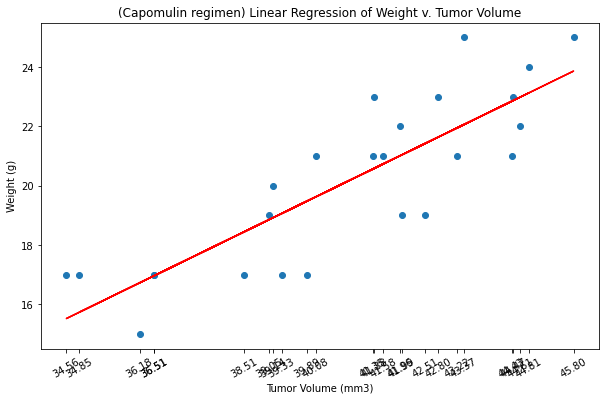

In [27]:
## Linear Regression Model
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(tumor_vol_capomulin, mouse_weight_capomulin)
cap_fit = cap_slope * tumor_vol_capomulin + cap_int

plt.figure(figsize=(10,6))
plt.scatter(tumor_vol_capomulin, mouse_weight_capomulin)
plt.plot(tumor_vol_capomulin, cap_fit, color='red')
plt.title('(Capomulin regimen) Linear Regression of Weight v. Tumor Volume')
plt.xticks(tumor_vol_capomulin, rotation=30)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()